In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords',
               'punkt',
               'wordnet',
               'omw-1.4',
               'vader_lexicon'
               ])
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
hotel_reviews =pd.read_csv('Tourist_Accomodation_Reviews.csv')
hotel_reviews.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn579710123,Reviewed 1 week ago,Phuket Town,Surf and Turf by Soul Kitchen,"Wow! What a find true TripAdvisor, so happy to..."
1,rn578870903,Reviewed 1 week ago,Phuket Town,Surf and Turf by Soul Kitchen,Best crossover Food i have ever had\r\nI was f...
2,rn576141183,Reviewed 3 weeks ago,Phuket Town,Surf and Turf by Soul Kitchen,Visited this restaurant based on the reviews b...
3,rn573849598,Reviewed 4 weeks ago,Phuket Town,Surf and Turf by Soul Kitchen,Me and my husband went for dinner here last ni...
4,rn572956411,"Reviewed April 12, 2018",Phuket Town,Surf and Turf by Soul Kitchen,French chef! Really concerned with the quality...


In [ ]:
hotel_reviews.shape

(2958, 5)

In [ ]:
hotel_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2958 entries, 0 to 2957
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     2958 non-null   object
 1   Review Date            2958 non-null   object
 2   Location               2958 non-null   object
 3   Hotel/Restaurant name  2958 non-null   object
 4   Review                 2958 non-null   object
dtypes: object(5)
memory usage: 115.7+ KB


**Text Mining**

In [ ]:
stop_words=nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
#Create function to apply all of the data preprocessing steps which we can then use in corpus

def preprocess_text(text):
  tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text) #Tokenize
  cleaned_tokens= [word.lower() for word in tokenized_document if word.lower() not in stop_words] #Remove stopwords
  stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens] #Stemming
  return stemmed_text

In [ ]:
hotel_reviews.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn579710123,Reviewed 1 week ago,Phuket Town,Surf and Turf by Soul Kitchen,"Wow! What a find true TripAdvisor, so happy to..."
1,rn578870903,Reviewed 1 week ago,Phuket Town,Surf and Turf by Soul Kitchen,Best crossover Food i have ever had\r\nI was f...
2,rn576141183,Reviewed 3 weeks ago,Phuket Town,Surf and Turf by Soul Kitchen,Visited this restaurant based on the reviews b...
3,rn573849598,Reviewed 4 weeks ago,Phuket Town,Surf and Turf by Soul Kitchen,Me and my husband went for dinner here last ni...
4,rn572956411,"Reviewed April 12, 2018",Phuket Town,Surf and Turf by Soul Kitchen,French chef! Really concerned with the quality...


In [ ]:
hotel_reviews['Review_Text']=hotel_reviews['Review'].apply(preprocess_text)
hotel_reviews.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,Review_Text
0,rn579710123,Reviewed 1 week ago,Phuket Town,Surf and Turf by Soul Kitchen,"Wow! What a find true TripAdvisor, so happy to...","[wow, find, true, tripadvisor, happi, chanc, d..."
1,rn578870903,Reviewed 1 week ago,Phuket Town,Surf and Turf by Soul Kitchen,Best crossover Food i have ever had\r\nI was f...,"[best, crossov, food, ever, fulli, satisfi, on..."
2,rn576141183,Reviewed 3 weeks ago,Phuket Town,Surf and Turf by Soul Kitchen,Visited this restaurant based on the reviews b...,"[visit, restaur, base, review, ta, order, beef..."
3,rn573849598,Reviewed 4 weeks ago,Phuket Town,Surf and Turf by Soul Kitchen,Me and my husband went for dinner here last ni...,"[husband, went, dinner, last, night, pleas, fo..."
4,rn572956411,"Reviewed April 12, 2018",Phuket Town,Surf and Turf by Soul Kitchen,French chef! Really concerned with the quality...,"[french, chef, realli, concern, qualiti, dish,..."


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(hotel_reviews['Review_Text'].map(' '.join))
X=pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())

X.head()

,00,000,0081,0082,0083,0085,0088,0089,008a,008b,...,yum,yummi,yummiest,yun,yung,zero,zimmerman,zimmern,zoo,zz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
hotel_reviews.describe()

,ID,Review Date,Location,Hotel/Restaurant name,Review,Review_Text
count,2958,2958,2958,2958,2958,2958
unique,2738,1298,1,30,2738,2738
top,rn529280390,Reviewed 2 weeks ago,Phuket Town,Surf and Turf by Soul Kitchen,"Great menu , good prices and pleasant service ...","[great, menu, good, price, pleasant, servic, g..."
freq,6,37,2958,100,6,6


**SENTIMENT ANALYSIS**



In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

In [ ]:
hotel_reviews['compound'] = [sentiment.polarity_scores(review)['compound'] for review in hotel_reviews['Review']]
hotel_reviews['neg'] = [sentiment.polarity_scores(review)['neg'] for review in hotel_reviews['Review']]
hotel_reviews['neu'] = [sentiment.polarity_scores(review)['neu'] for review in hotel_reviews['Review']]
hotel_reviews['pos'] = [sentiment.polarity_scores(review)['pos'] for review in hotel_reviews['Review']]

In [ ]:
hotel_reviews.describe()

,compound,neg,neu,pos
count,2958.000000,2958.000000,2958.000000,2958.000000
mean,0.624930,0.028547,0.753223,0.218227
std,0.443828,0.051419,0.124182,0.131998
min,-0.964600,0.000000,0.287000,0.000000
25%,0.534650,0.000000,0.672000,0.122000
50%,0.817300,0.000000,0.762000,0.209000
75%,0.916000,0.045000,0.839000,0.306000
max,0.990400,0.380000,1.000000,0.713000


In [ ]:
hotel_reviews[['compound','neg','neu','pos']].describe()

,compound,neg,neu,pos
count,2958.000000,2958.000000,2958.000000,2958.000000
mean,0.624930,0.028547,0.753223,0.218227
std,0.443828,0.051419,0.124182,0.131998
min,-0.964600,0.000000,0.287000,0.000000
25%,0.534650,0.000000,0.672000,0.122000
50%,0.817300,0.000000,0.762000,0.209000
75%,0.916000,0.045000,0.839000,0.306000
max,0.990400,0.380000,1.000000,0.713000


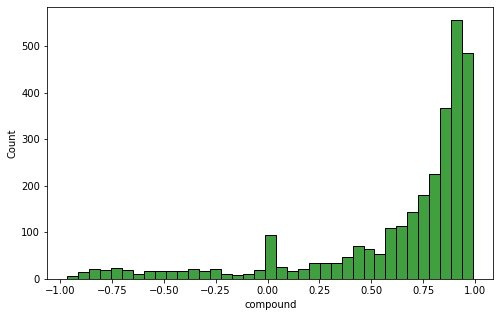

In [ ]:
plt.figure(figsize = (8,5))
sns.histplot(hotel_reviews['compound'],color='green')

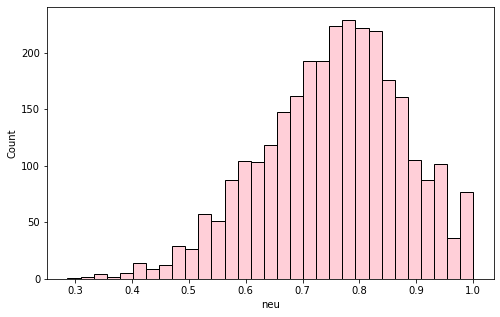

In [ ]:

plt.figure(figsize = (8,5))
sns.histplot(hotel_reviews['neu'],color='pink')

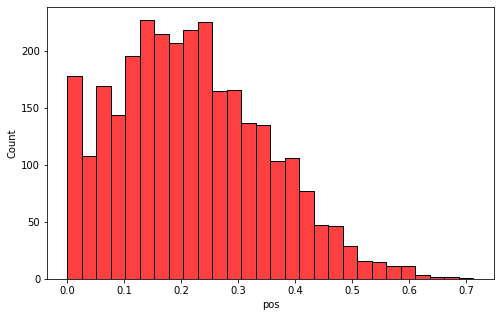

In [ ]:
plt.figure(figsize = (8,5))
sns.histplot(hotel_reviews['pos'],color='red')

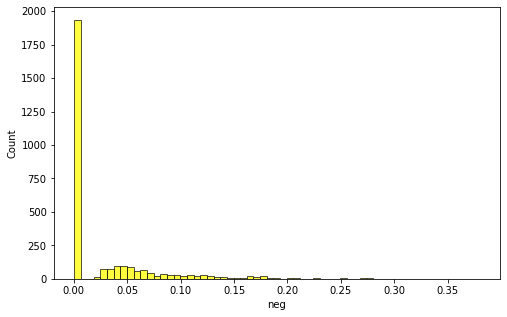

In [ ]:
plt.figure(figsize = (8,5))
sns.histplot(hotel_reviews['neg'],color='yellow')

In [ ]:
#  Negative reviews

(hotel_reviews['compound']<=0).groupby(hotel_reviews['Hotel/Restaurant name']).sum()

Hotel/Restaurant name
Archee Restaurant                                      6
Beach Bar                                             14
Blue Elephant Phuket                                   4
China Inn Cafe                                         6
Crust                                                  6
Dibuk restaurant                                      13
Eleven Two & Co.                                       9
Fuji Japanese Restaurant - Central Festival Phuket     5
Honeymoon Thai Restaurant by Kenya                    10
Khaorang Breeze Restaurant                            10
Kopitiam by Wilai                                     10
La Gaetana                                             7
Le Siam                                               28
MK Gold Restaurant                                    21
Mee Ton Poe                                           10
Mor Mu Dong                                           10
Mr.Coffee                                              7
Natural R

In [ ]:
# % of total negative reviews

percent_negative = pd.DataFrame((hotel_reviews['compound']<=0).groupby(hotel_reviews['Hotel/Restaurant name']).sum()
                                /hotel_reviews['Hotel/Restaurant name'].groupby(hotel_reviews['Hotel/Restaurant name']).count()*100,
                              columns=['% negative reviews']).sort_values(by='% negative reviews')
percent_negative

,% negative reviews
Hotel/Restaurant name,
OSOT,3.000000
Blue Elephant Phuket,4.000000
Surf and Turf by Soul Kitchen,5.000000
Fuji Japanese Restaurant - Central Festival Phuket,5.000000
Crust,6.000000
China Inn Cafe,6.060606
Archee Restaurant,6.185567
Suay Restaurant,7.000000
Salvatore's restaurant,7.000000


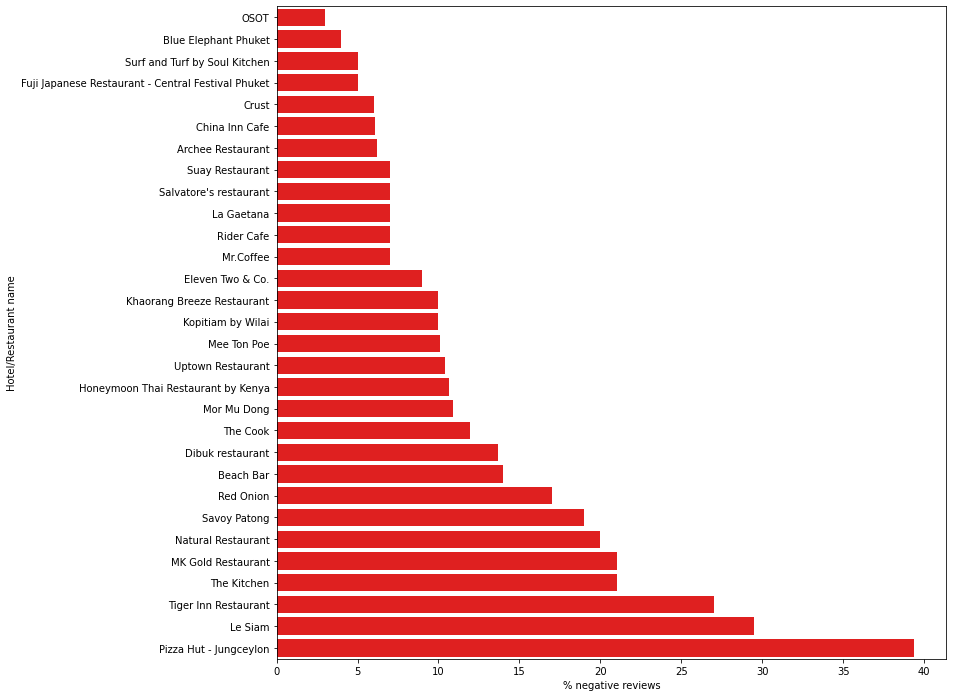

In [ ]:
plt.figure(figsize = (12,12))
sns.barplot(data=percent_negative,x='% negative reviews',y=percent_negative.index,color='red')


In [ ]:
reviews_positive_subset = hotel_reviews.loc[(hotel_reviews['Hotel/Restaurant name']=='Pizza Hut - Jungceylon')
                                  &(hotel_reviews['compound']>0),:]

reviews_negative_subset = hotel_reviews.loc[(hotel_reviews['Hotel/Restaurant name']=='Pizza Hut - Jungceylon')
                                  & (hotel_reviews['compound']<=0),:]

reviews_negative_subset.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,Review_Text,compound,neg,neu,pos
2859,rn579775211,Reviewed 1 week ago,Phuket Town,Pizza Hut - Jungceylon,The Pizza are terrible and very expensive. You...,"[pizza, terribl, expens, cannot, pay, price, p...",-0.7785,0.178,0.793,0.029
2863,rn567681816,"Reviewed March 20, 2018",Phuket Town,Pizza Hut - Jungceylon,"We ordered some pizza for the family, but they...","[order, pizza, famili, forgut, bring, us, one,...",-0.6956,0.120,0.880,0.000
2864,rn562985064,"Reviewed February 26, 2018",Phuket Town,Pizza Hut - Jungceylon,I am obsessed with Pizza Hut so could not resi...,"[obsess, pizza, hut, could, resist, visit, out...",-0.8020,0.177,0.823,0.000
2865,rn558515004,"Reviewed February 4, 2018",Phuket Town,Pizza Hut - Jungceylon,I was staying at the branch in Patong Thailand...,"[stay, branch, patong, thailand, jungceylon, m...",-0.6901,0.122,0.878,0.000
2870,rn546394714,"Reviewed December 10, 2017",Phuket Town,Pizza Hut - Jungceylon,I've been to Pizza Hut many times before but t...,"[i'v, pizza, hut, mani, time, place, way, stan...",-0.7964,0.162,0.838,0.000


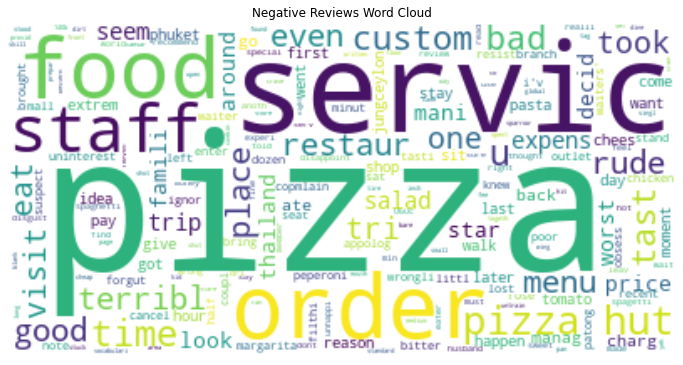

In [ ]:
#wordcloud of words from negative reviews
neg_tokens =[word for review in reviews_negative_subset['Review_Text'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(neg_tokens))

plt.figure(figsize=(12,12))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.title('Negative Reviews Word Cloud')
plt.show()

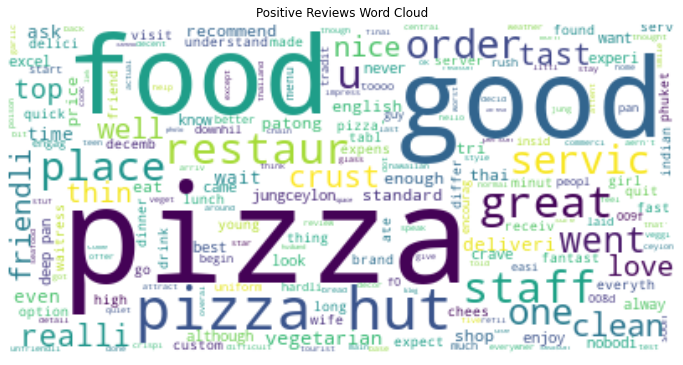

In [ ]:
#wordcloud of words from positive reviews

pos_tokens = [word for review in reviews_positive_subset['Review_Text'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(pos_tokens))

plt.figure(figsize=(12,12))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.title('Positive Reviews Word Cloud')
plt.show()

In [ ]:
#use the nltk FreqDist and then Tabulate

from  nltk.probability import FreqDist

pos_freqdist =  FreqDist(pos_tokens)
pos_freqdist.tabulate(20)

  pizza    good    food     hut   great restaur   staff    like   place   order  servic     one    went   clean   crust  realli    tast      us    love    well 
     91      36      35      34      19      17      17      17      16      15      15      13      12      10       9       9       9       9       8       8 


In [ ]:
#use the nltk FreqDist and then Tabulate

from  nltk.probability import FreqDist

neg_freqdist =  FreqDist(neg_tokens)
neg_freqdist.tabulate(20)

  pizza  servic   order    food     hut   staff    time    like    tast     bad  custom terribl restaur      us    menu    rude   place    good    even     eat 
     47      19      14      13      12      12      10       9       8       8       8       7       7       7       7       7       7       7       7       6 


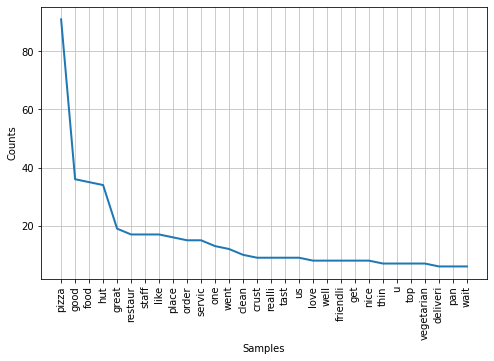

In [ ]:
plt.figure(figsize = (8,5))
pos_freqdist.plot(30)

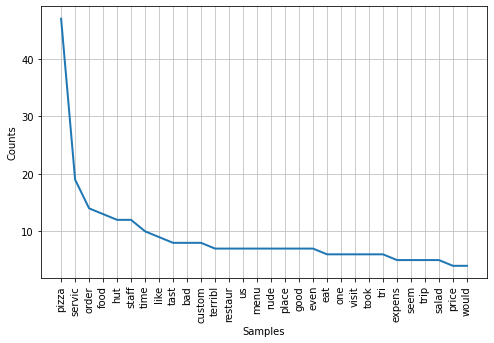

In [ ]:
plt.figure(figsize = (8,5))
neg_freqdist.plot(30)

In [ ]:
#  Positve reviews

(hotel_reviews['compound']>0).groupby(hotel_reviews['Hotel/Restaurant name']).sum()

Hotel/Restaurant name
Archee Restaurant                                     91
Beach Bar                                             86
Blue Elephant Phuket                                  96
China Inn Cafe                                        93
Crust                                                 94
Dibuk restaurant                                      82
Eleven Two & Co.                                      91
Fuji Japanese Restaurant - Central Festival Phuket    95
Honeymoon Thai Restaurant by Kenya                    84
Khaorang Breeze Restaurant                            90
Kopitiam by Wilai                                     90
La Gaetana                                            93
Le Siam                                               67
MK Gold Restaurant                                    79
Mee Ton Poe                                           89
Mor Mu Dong                                           82
Mr.Coffee                                             93
Natural R

In [ ]:
# % of total Positive reviews

percent_positive = pd.DataFrame((hotel_reviews['compound']>0).groupby(hotel_reviews['Hotel/Restaurant name']).sum()
                                /hotel_reviews['Hotel/Restaurant name'].groupby(hotel_reviews['Hotel/Restaurant name']).count()*100,
                              columns=['% positive reviews']).sort_values(by='% positive reviews')
percent_positive

,% positive reviews
Hotel/Restaurant name,
Pizza Hut - Jungceylon,60.606061
Le Siam,70.526316
Tiger Inn Restaurant,73.000000
The Kitchen,79.000000
MK Gold Restaurant,79.000000
Natural Restaurant,80.000000
Savoy Patong,81.000000
Red Onion,83.000000
Beach Bar,86.000000


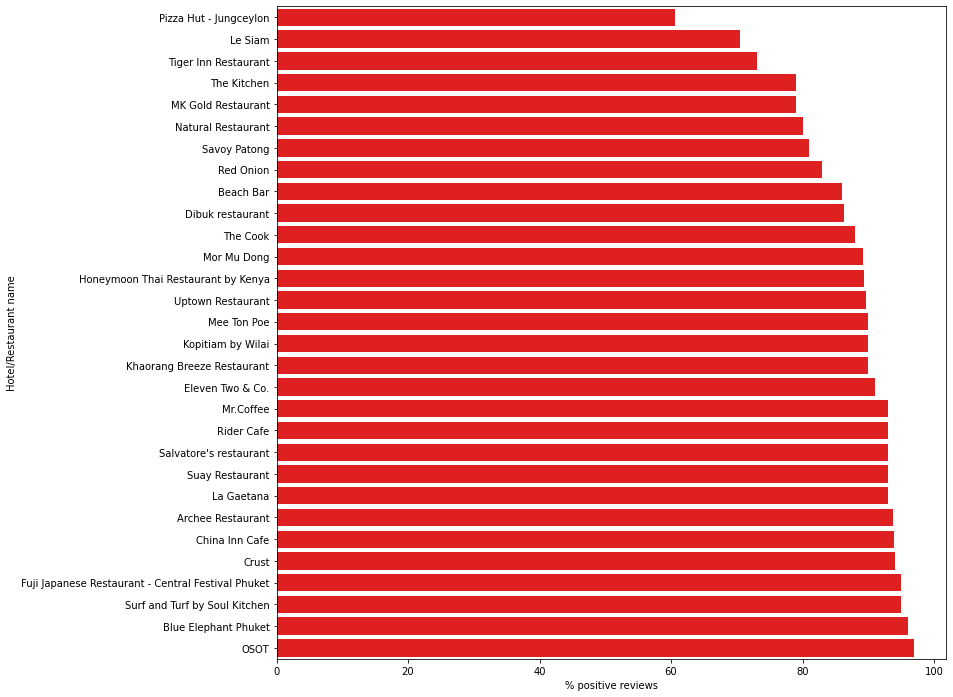

In [ ]:
plt.figure(figsize = (12,12))
sns.barplot(data=percent_positive,x='% positive reviews',y=percent_positive.index,color='red')

In [ ]:
reviews_positive_subset = hotel_reviews.loc[(hotel_reviews['Hotel/Restaurant name']=='Blue Elephant Phuket')
                                  &(hotel_reviews['compound']>0),:]

reviews_negative_subset = hotel_reviews.loc[(hotel_reviews['Hotel/Restaurant name']=='Blue Elephant Phuket')
                                  & (hotel_reviews['compound']<=0),:]

reviews_positive_subset.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,Review_Text,compound,neg,neu,pos
786,rn579393081,Reviewed 1 week ago,Phuket Town,Blue Elephant Phuket,"Great service!\r\nFood is fantastic, haven’t h...","[great, servic, food, fantast, better, thai, i...",0.7701,0.0,0.785,0.215
787,rn578238151,Reviewed 2 weeks ago,Phuket Town,Blue Elephant Phuket,Blue Elephant comes highly recommended by ever...,"[blue, eleph, come, highli, recommend, everyon...",0.9577,0.0,0.644,0.356
788,rn578192087,Reviewed 2 weeks ago,Phuket Town,Blue Elephant Phuket,They served traditional Thai food. The Food an...,"[serv, tradit, thai, food, food, servic, amaz,...",0.9258,0.0,0.748,0.252
789,rn577413014,Reviewed 2 weeks ago,Phuket Town,Blue Elephant Phuket,My husband and I have visited the Blue Elephan...,"[husband, visit, blue, eleph, bangkok, number,...",0.9665,0.0,0.660,0.340
790,rn576353828,Reviewed 3 weeks ago,Phuket Town,Blue Elephant Phuket,This is what you call ‘A Night Out’; the entir...,"[call, night, entir, experi, five, star, food,...",0.6696,0.0,0.894,0.106


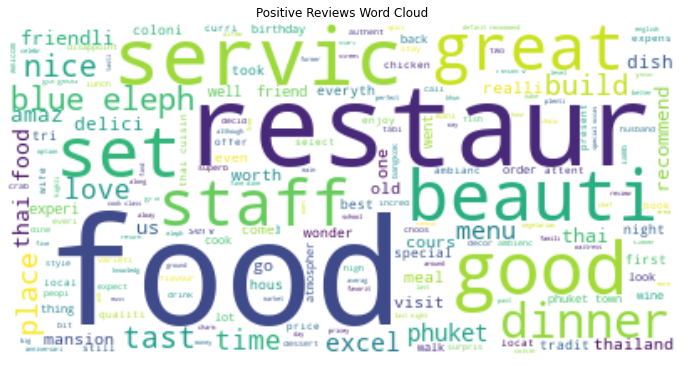

In [ ]:
#wordcloud of words from positive reviews

pos_tokens = [word for review in reviews_positive_subset['Review_Text'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(pos_tokens))

plt.figure(figsize=(12,12))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.title('Positive Reviews Word Cloud')
plt.show()

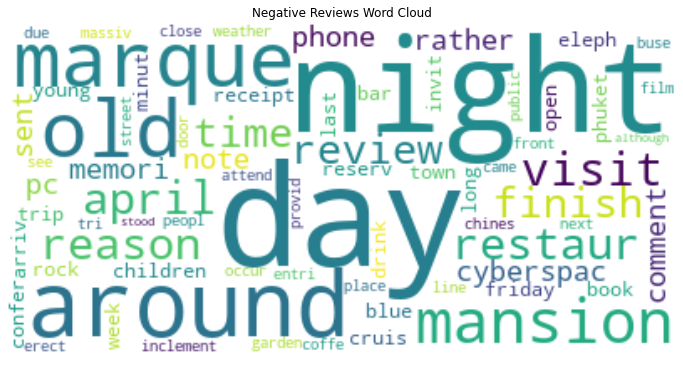

In [ ]:
#wordcloud of words from negative reviews
neg_tokens =[word for review in reviews_negative_subset['Review_Text'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(neg_tokens))

plt.figure(figsize=(12,12))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.title('Negative Reviews Word Cloud')
plt.show()

In [ ]:
pos_freqdist =  FreqDist(pos_tokens)
pos_freqdist.tabulate(20)

     food   restaur    servic      thai      good    beauti       set     great     eleph     staff      blue    dinner    phuket      tast      nice     place     build recommend      time      love 
       76        34        33        28        27        25        25        24        24        24        22        22        19        18        17        16        16        15        15        15 


In [ ]:
neg_freqdist =  FreqDist(neg_tokens)
neg_freqdist.tabulate(20)

      day     night    around    marque       old   mansion     visit   restaur     april      2017    reason    review      time    finish cyberspac      sent     phone    rather        pc   comment 
        2         2         2         2         2         2         1         1         1         1         1         1         1         1         1         1         1         1         1         1 


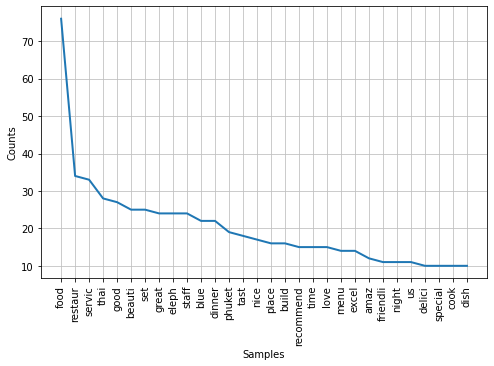

In [ ]:
plt.figure(figsize = (8,5))
pos_freqdist.plot(30)

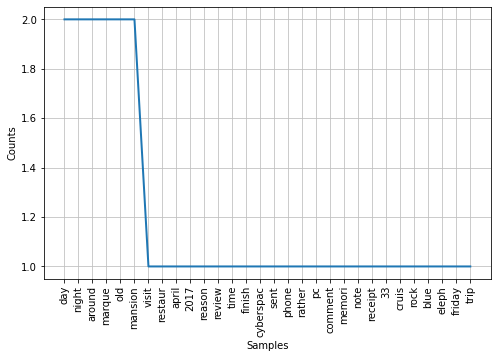

In [ ]:
plt.figure(figsize = (8,5))
neg_freqdist.plot(30)